In [89]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils.utils import *
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.patches as mpatches

In [90]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
# Set up paths
script_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(script_dir, os.pardir))
tableu_dir = os.path.join(root_dir, 'tableau')
porcessed_data_dir = os.path.join(script_dir, 'processed_data')

In [92]:
output_df = pd.read_csv(os.path.join(tableu_dir, 'bardis_ensemble_python_ver_1000.csv'))
output_df

,Resources,Economy,Bureaucracy,Pollution,time,run_id
0,1.000000,1.000000,1.000000,1.000000,0.0,1.0
1,0.983784,1.000960,0.998752,1.016100,0.2,1.0
2,0.967711,1.001403,0.997471,1.031933,0.4,1.0
3,0.951795,1.001332,0.996156,1.047494,0.6,1.0
4,0.936050,1.000748,0.994805,1.062779,0.8,1.0
...,...,...,...,...,...,...
1000995,-0.000081,-0.000107,0.340252,0.059603,199.2,1000.0
1000996,-0.000081,-0.000107,0.339812,0.059526,199.4,1000.0
1000997,-0.000081,-0.000107,0.339372,0.059449,199.6,1000.0
1000998,-0.000081,-0.000107,0.338933,0.059372,199.8,1000.0


In [93]:
fe = FeatureExtractor()
edau = EDAUtils()

# Time Series Clustering (Simple Approach)

## Create freatures df

In [94]:
transformed_output_df = output_df.groupby("run_id").apply(fe.extract_ts_features).reset_index()
transformed_output_df.head()

/tmp/ipykernel_11519/2146751510.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transformed_output_df = output_df.groupby("run_id").apply(fe.extract_ts_features).reset_index()


,run_id,Resources_final,Resources_max,Resources_min,Resources_auc,Resources_max_min_diff,Resources_final_min_diff,Resources_final_initial_diff,Resources_time_to_collapse,Resources_std,...,Pollution_final_min_diff,Pollution_final_initial_diff,Pollution_time_to_collapse,Pollution_std,Pollution_growth_rate_t4,Pollution_growth_rate_t25,Pollution_early_delta,Pollution_mid_delta,Pollution_early_avg_diff,Pollution_mid_avg_diff
0,1.0,7.483451e+07,7.483451e+07,0.459866,7.161183e+08,7.483451e+07,7.483451e+07,7.483451e+07,200.0,1.112267e+07,...,0.00000,-1.000012,89.2,0.537022,0.066928,0.013563,0.077784,0.267711,0.015695,0.013532
1,2.0,-8.054008e-05,1.000000e+00,-0.000081,2.996052e+00,1.000081e+00,0.000000e+00,-1.000081e+00,5.2,9.567659e-02,...,1.14302,0.413895,200.0,0.320603,-0.026859,-0.027453,-0.013735,-0.107437,-0.002573,-0.005217
2,3.0,-1.693546e-04,1.000000e+00,-0.000169,4.514829e+00,1.000169e+00,0.000000e+00,-1.000169e+00,7.8,1.127861e-01,...,0.00000,-0.986061,72.2,0.300675,0.015316,-0.012533,0.025027,0.061262,0.005124,0.003193
3,4.0,-1.860879e-04,1.000000e+00,-0.000186,7.161374e+00,1.000186e+00,0.000000e+00,-1.000186e+00,12.6,1.400753e-01,...,0.00000,-0.983383,103.0,0.431694,0.039758,0.006860,0.046195,0.159030,0.009315,0.008042
4,5.0,8.005388e+05,8.005388e+05,0.447694,1.033277e+07,8.005384e+05,8.005384e+05,8.005378e+05,200.0,1.352522e+05,...,0.00000,-1.001063,165.6,1.499092,0.102492,0.048287,0.112099,0.409968,0.022537,0.020632


In [95]:
transformed_output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   run_id                          1000 non-null   float64
 1   Resources_final                 1000 non-null   float64
 2   Resources_max                   1000 non-null   float64
 3   Resources_min                   1000 non-null   float64
 4   Resources_auc                   1000 non-null   float64
 5   Resources_max_min_diff          1000 non-null   float64
 6   Resources_final_min_diff        1000 non-null   float64
 7   Resources_final_initial_diff    1000 non-null   float64
 8   Resources_time_to_collapse      1000 non-null   float64
 9   Resources_std                   1000 non-null   float64
 10  Resources_growth_rate_t4        1000 non-null   float64
 11  Resources_growth_rate_t25       1000 non-null   float64
 12  Resources_early_delta           100

## Data Cleaning

- Drop duplicates?

In [96]:
transformed_output_df.isnull().sum().sort_values(ascending=False).head()


run_id             0
Resources_final    0
Resources_max      0
Resources_min      0
Resources_auc      0
dtype: int64

In [97]:
# Check for duplicates
transformed_output_df.duplicated().sum()

np.int64(0)

In [98]:
# Drop run_id to create features dataframe
features_df = transformed_output_df.drop(columns=["run_id"])
features_df.head()

,Resources_final,Resources_max,Resources_min,Resources_auc,Resources_max_min_diff,Resources_final_min_diff,Resources_final_initial_diff,Resources_time_to_collapse,Resources_std,Resources_growth_rate_t4,...,Pollution_final_min_diff,Pollution_final_initial_diff,Pollution_time_to_collapse,Pollution_std,Pollution_growth_rate_t4,Pollution_growth_rate_t25,Pollution_early_delta,Pollution_mid_delta,Pollution_early_avg_diff,Pollution_mid_avg_diff
0,7.483451e+07,7.483451e+07,0.459866,7.161183e+08,7.483451e+07,7.483451e+07,7.483451e+07,200.0,1.112267e+07,-0.071192,...,0.00000,-1.000012,89.2,0.537022,0.066928,0.013563,0.077784,0.267711,0.015695,0.013532
1,-8.054008e-05,1.000000e+00,-0.000081,2.996052e+00,1.000081e+00,0.000000e+00,-1.000081e+00,5.2,9.567659e-02,-0.172624,...,1.14302,0.413895,200.0,0.320603,-0.026859,-0.027453,-0.013735,-0.107437,-0.002573,-0.005217
2,-1.693546e-04,1.000000e+00,-0.000169,4.514829e+00,1.000169e+00,0.000000e+00,-1.000169e+00,7.8,1.127861e-01,-0.135023,...,0.00000,-0.986061,72.2,0.300675,0.015316,-0.012533,0.025027,0.061262,0.005124,0.003193
3,-1.860879e-04,1.000000e+00,-0.000186,7.161374e+00,1.000186e+00,0.000000e+00,-1.000186e+00,12.6,1.400753e-01,-0.092957,...,0.00000,-0.983383,103.0,0.431694,0.039758,0.006860,0.046195,0.159030,0.009315,0.008042
4,8.005388e+05,8.005388e+05,0.447694,1.033277e+07,8.005384e+05,8.005384e+05,8.005378e+05,200.0,1.352522e+05,-0.079347,...,0.00000,-1.001063,165.6,1.499092,0.102492,0.048287,0.112099,0.409968,0.022537,0.020632


## EDA

In [99]:
features_df.describe()

,Resources_final,Resources_max,Resources_min,Resources_auc,Resources_max_min_diff,Resources_final_min_diff,Resources_final_initial_diff,Resources_time_to_collapse,Resources_std,Resources_growth_rate_t4,...,Pollution_final_min_diff,Pollution_final_initial_diff,Pollution_time_to_collapse,Pollution_std,Pollution_growth_rate_t4,Pollution_growth_rate_t25,Pollution_early_delta,Pollution_mid_delta,Pollution_early_avg_diff,Pollution_mid_avg_diff
count,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.00000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.121650e+06,8.121651e+06,0.048360,7.475332e+07,8.121651e+06,8.121650e+06,8.121649e+06,28.71440,1.186416e+06,-0.108430,...,0.296009,-0.590596,100.883800,0.338895,-0.004829,-0.014149,-0.000871,-0.019317,-0.000133,-0.000909
std,6.342219e+07,6.342219e+07,0.156365,5.728352e+08,6.342219e+07,6.342219e+07,6.342219e+07,55.66755,9.189872e+06,0.034204,...,2.981084,3.054179,59.106415,0.827160,0.040579,0.017634,0.046549,0.162314,0.009398,0.008188
min,-5.500524e-04,1.000000e+00,-0.000550,2.678457e+00,1.000000e+00,0.000000e+00,-1.000550e+00,4.60000,9.070924e-02,-0.186196,...,0.000000,-1.033206,18.600000,0.077648,-0.090101,-0.033795,-0.112384,-0.360405,-0.022836,-0.018270
25%,-2.098576e-04,1.000000e+00,-0.000210,4.231617e+00,1.000081e+00,0.000000e+00,-1.000210e+00,7.20000,1.123032e-01,-0.135060,...,0.000000,-0.994469,54.800000,0.170752,-0.036553,-0.027314,-0.036126,-0.146213,-0.007206,-0.007293
50%,-1.238550e-04,1.000000e+00,-0.000124,5.459780e+00,1.000160e+00,0.000000e+00,-1.000124e+00,9.40000,1.261040e-01,-0.110625,...,0.000000,-0.955685,78.900000,0.230954,-0.009740,-0.020547,-0.003624,-0.038960,-0.000579,-0.001911
75%,-4.328090e-05,1.000000e+00,-0.000043,7.934982e+00,1.000274e+00,0.000000e+00,-1.000043e+00,13.25000,1.484460e-01,-0.084338,...,0.000000,-0.821753,141.050000,0.351599,0.026781,-0.005924,0.035552,0.107124,0.007206,0.005476
max,1.003685e+09,1.003685e+09,0.899583,8.925059e+09,1.003685e+09,1.003685e+09,1.003685e+09,200.00000,1.444541e+08,-0.009164,...,59.566934,59.566934,200.000000,15.569104,0.107328,0.070979,0.114952,0.429313,0.023146,0.021558


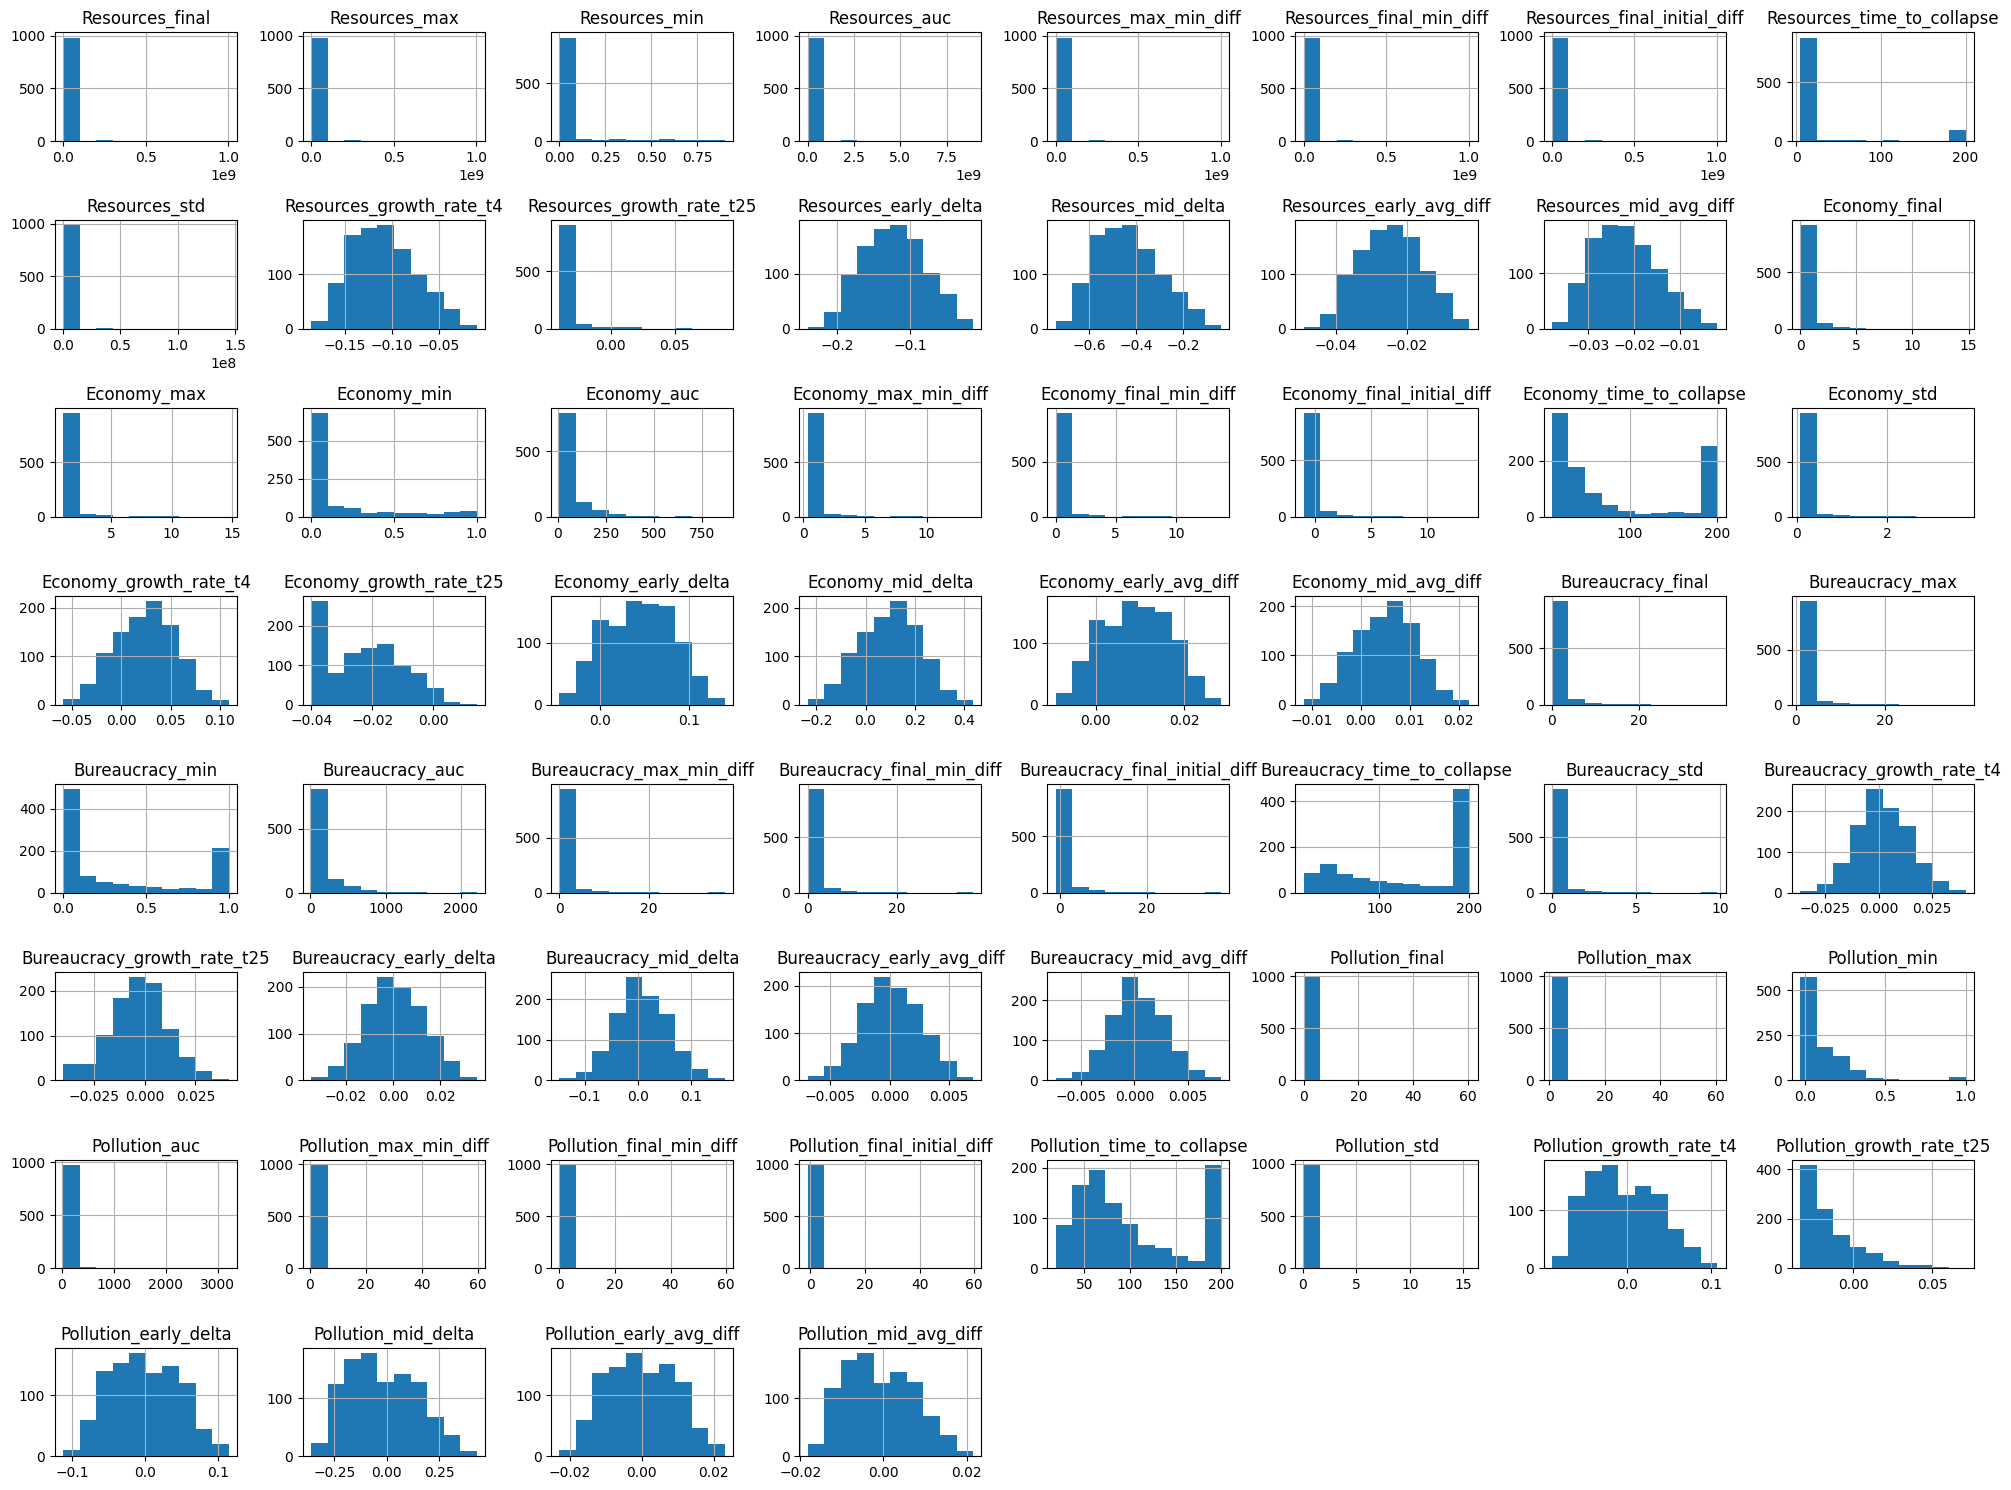

In [100]:
edau.plot_histograms(features_df)

In [101]:
# # Correlation heatmap to inspect relationships between features
# plt.figure(figsize=(40, 20))
# sns.heatmap(features_df.corr(), annot=True, cmap="coolwarm")
# plt.title("Feature Correlation Heatmap")
# plt.show()

In [102]:
# Calculate skewness for numeric features in the DataFrame
skewness = features_df.skew(numeric_only=True)
# print("Skewness of features:\n", skewness)

# Define a threshold for high skewness, e.g., absolute skewness > 1
threshold = 1
skewed_features = skewness[abs(skewness) > threshold].index.tolist()
print("Skewed features:", skewed_features)


Skewed features: ['Resources_final', 'Resources_max', 'Resources_min', 'Resources_auc', 'Resources_max_min_diff', 'Resources_final_min_diff', 'Resources_final_initial_diff', 'Resources_time_to_collapse', 'Resources_std', 'Resources_growth_rate_t25', 'Economy_final', 'Economy_max', 'Economy_min', 'Economy_auc', 'Economy_max_min_diff', 'Economy_final_min_diff', 'Economy_final_initial_diff', 'Economy_std', 'Bureaucracy_final', 'Bureaucracy_max', 'Bureaucracy_auc', 'Bureaucracy_max_min_diff', 'Bureaucracy_final_min_diff', 'Bureaucracy_final_initial_diff', 'Bureaucracy_std', 'Pollution_final', 'Pollution_max', 'Pollution_min', 'Pollution_auc', 'Pollution_max_min_diff', 'Pollution_final_min_diff', 'Pollution_final_initial_diff', 'Pollution_std', 'Pollution_growth_rate_t25']


In [103]:
features_df_no_skew = features_df.drop(columns=skewed_features)

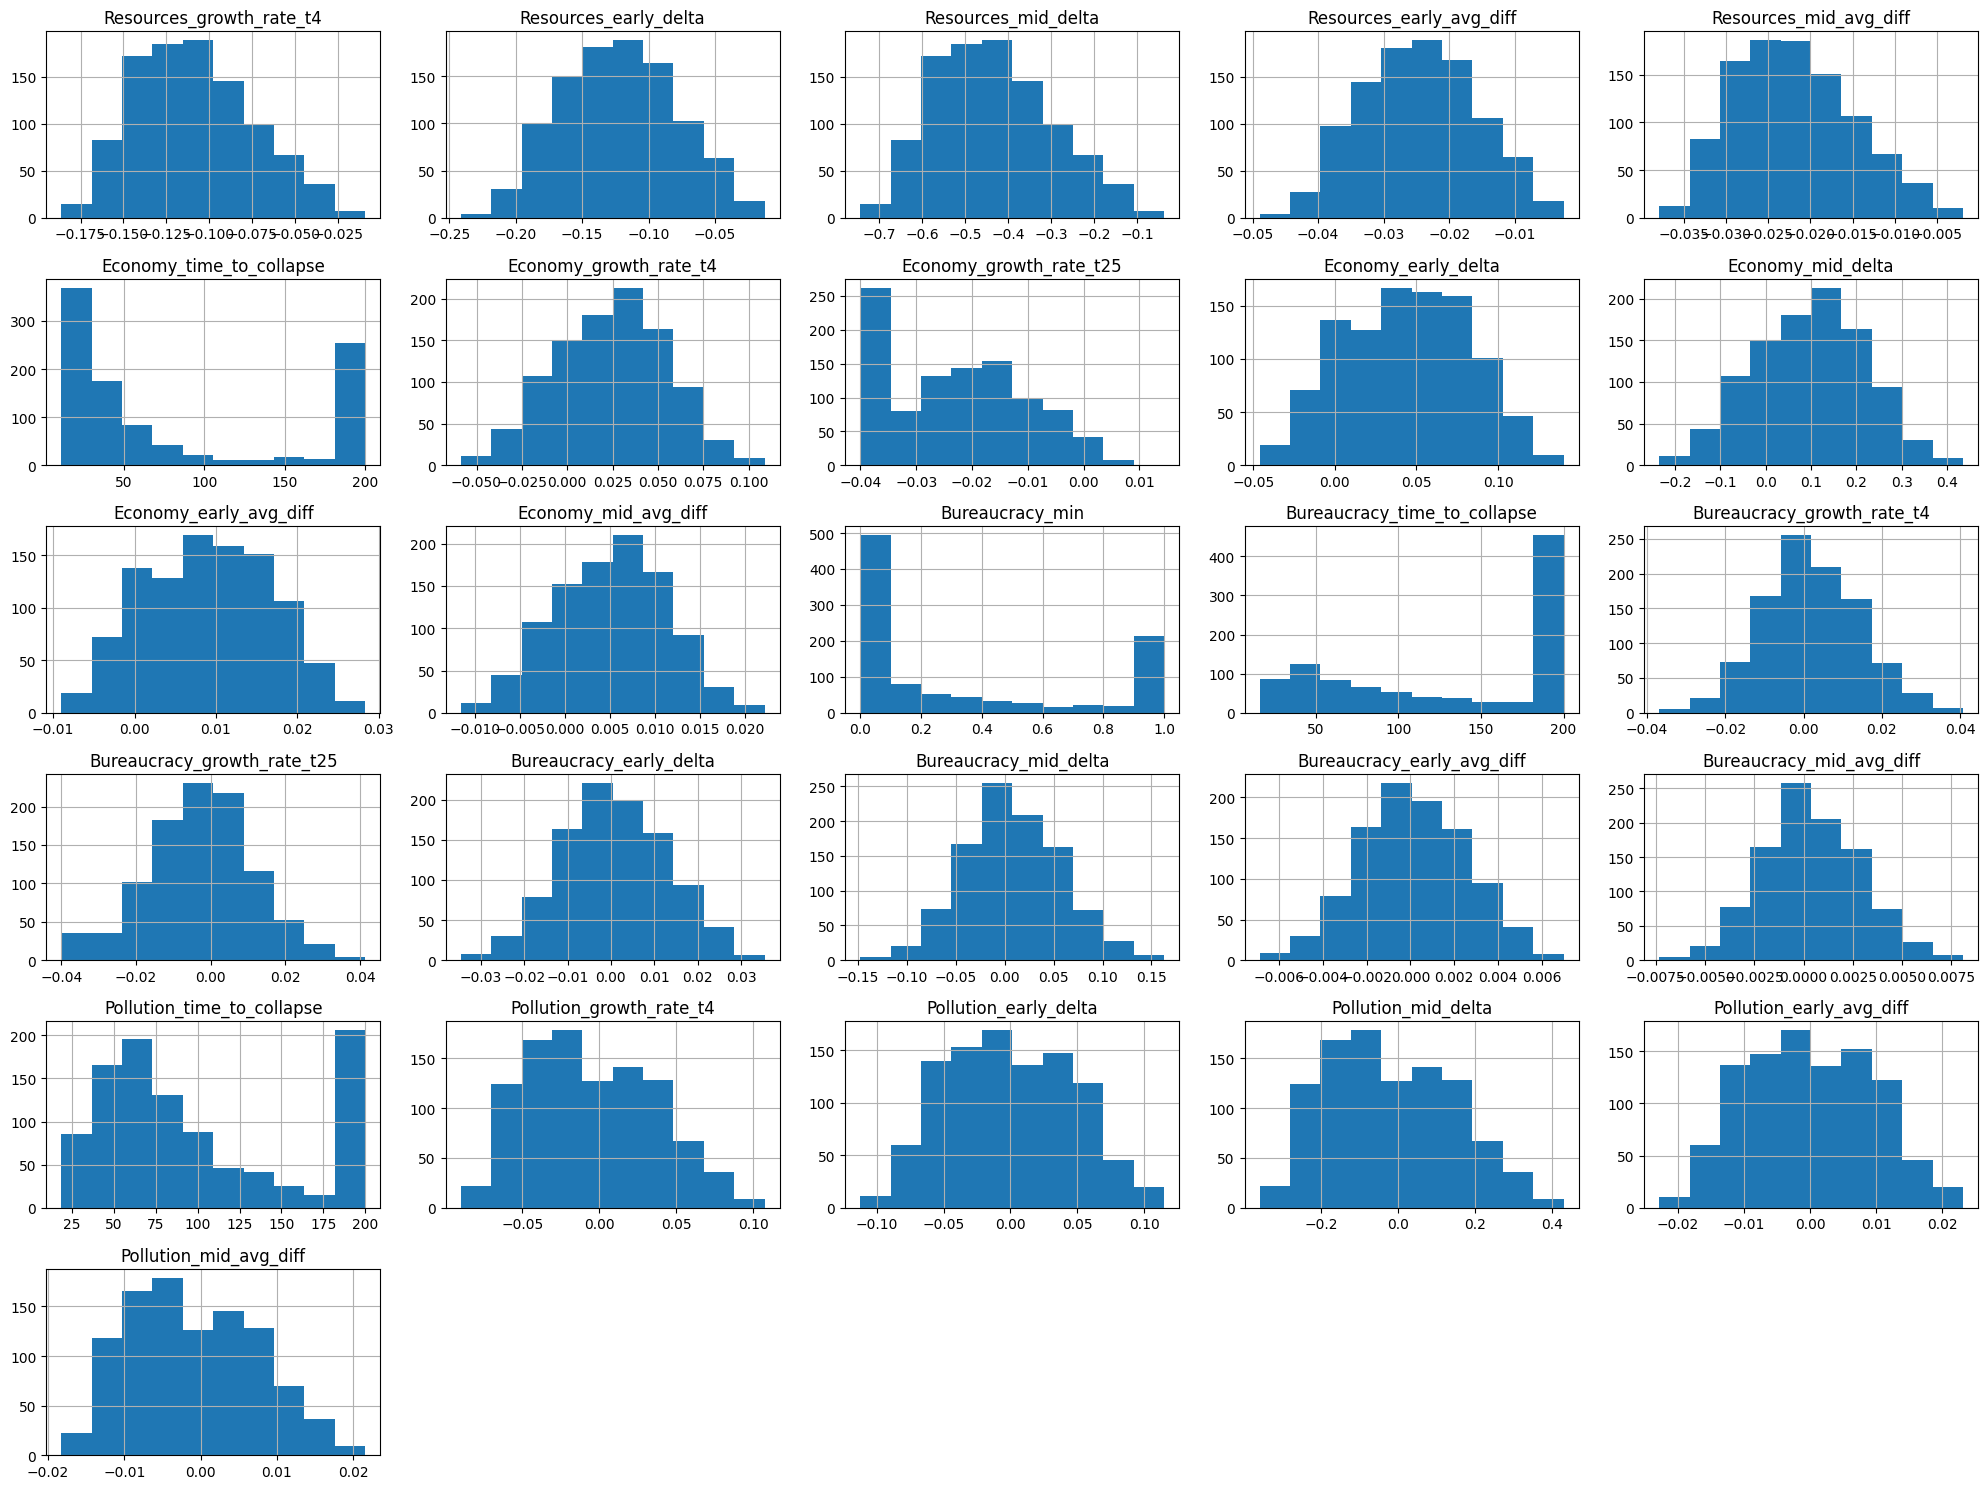

In [104]:
# Histograms for each numeric feature
edau.plot_histograms(features_df_no_skew)

In [105]:
# Log-transform the skewed features
features_df_log = features_df.copy()
features_df_log = edau.apply_log_transform(features_df_log, skewed_features)

Applied log1p with offset 1.0005500524134083 to column: Resources_final
Applied natural log to column: Resources_max
Applied log1p with offset 1.0005500524134083 to column: Resources_min
Applied natural log to column: Resources_auc
Applied natural log to column: Resources_max_min_diff
Applied log1p with offset 1.0 to column: Resources_final_min_diff
Applied log1p with offset 2.0005500524134083 to column: Resources_final_initial_diff
Applied natural log to column: Resources_time_to_collapse
Applied natural log to column: Resources_std
Applied log1p with offset 1.0400220020965363 to column: Resources_growth_rate_t25
Applied log1p with offset 1.0010946392246578 to column: Economy_final
Applied natural log to column: Economy_max
Applied log1p with offset 1.0010946392246578 to column: Economy_min
Applied natural log to column: Economy_auc
Applied natural log to column: Economy_max_min_diff
Applied log1p with offset 1.0 to column: Economy_final_min_diff
Applied log1p with offset 2.0010946392

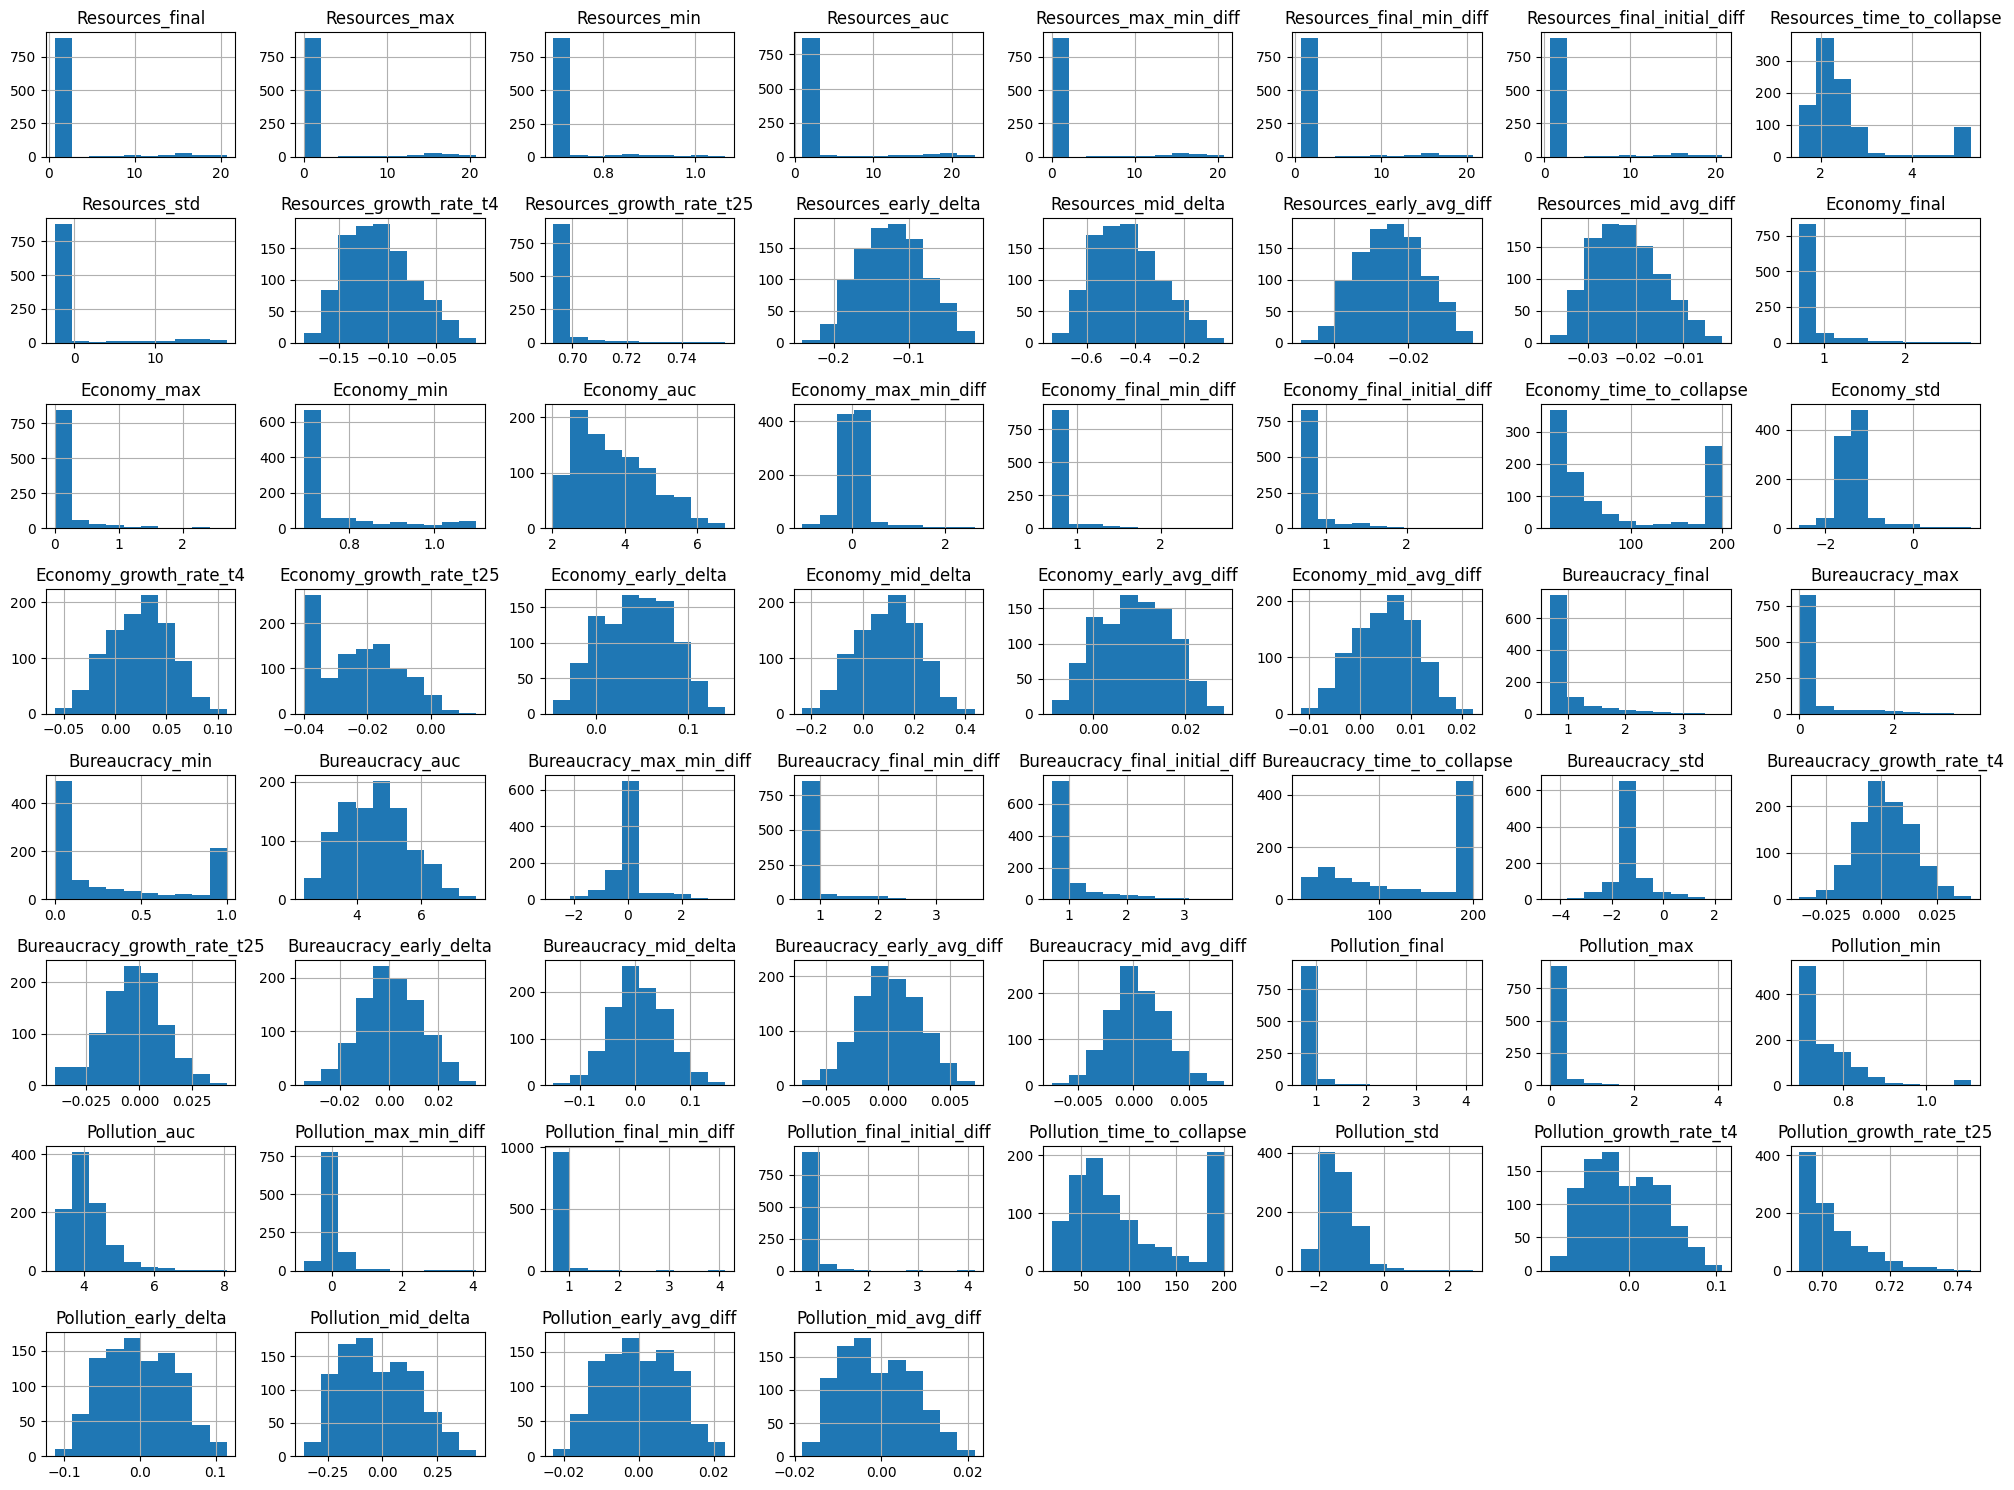

In [106]:
edau.plot_histograms(features_df_log)

## Preprocess data

- Drop redoundant variables?
- Drop vars that have very thight distributions?

In [107]:
# Scale the features
# X = features_df.drop(columns=["run_id"])
X = features_df_log.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape

(1000, 60)

Number of components selected: 7


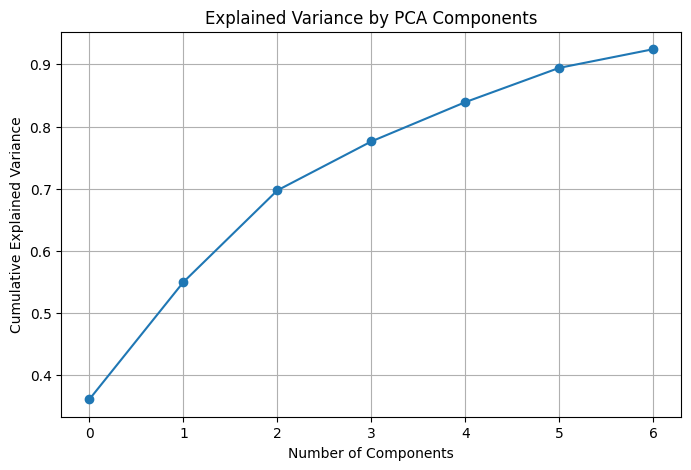

In [108]:
# Retain enough components to explain 90% of the variance
pca = PCA(n_components=0.9, random_state=42)
df_pca = pca.fit_transform(X_scaled)

print("Number of components selected:", pca.n_components_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

Explained variance ratio for all components: [3.61688952e-01 1.88261460e-01 1.47391503e-01 7.86032107e-02
 6.31525186e-02 5.51129527e-02 2.99955774e-02 2.32845759e-02
 1.21915976e-02 8.64537841e-03 6.37703132e-03 5.23961210e-03
 3.94102055e-03 3.79426438e-03 2.75356537e-03 2.16634405e-03
 1.89160284e-03 1.13413460e-03 9.99019747e-04 7.86941325e-04
 5.41760350e-04 3.75875663e-04 3.29230467e-04 2.86045922e-04
 1.95065499e-04 1.64279289e-04 1.41737487e-04 1.17311872e-04
 9.96557083e-05 7.79003822e-05 5.78339434e-05 5.67091703e-05
 4.44941165e-05 3.73937812e-05 2.39199524e-05 1.45911368e-05
 9.49044481e-06 7.05138559e-06 3.88829320e-06 2.24472463e-06
 2.08647676e-06 1.19842584e-07 4.28134070e-08 4.70528284e-09
 1.60571899e-09 1.44395502e-09 5.84373208e-10 4.39043469e-10
 2.60681006e-11 1.23715372e-11 1.11179249e-11 4.17757383e-12
 2.14279565e-17 1.14565279e-17 9.03340179e-18 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


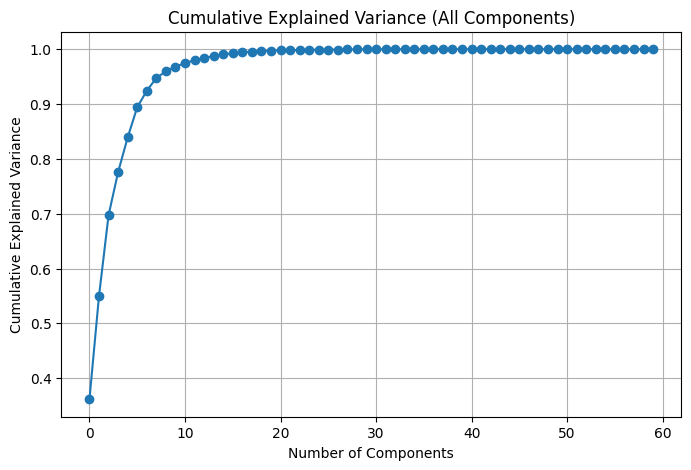

In [109]:
pca_full = PCA(n_components=None, random_state=42)
df_pca_full = pca_full.fit_transform(X_scaled)
print("Explained variance ratio for all components:", pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance (All Components)")
plt.grid(True)
plt.show()


In [110]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36168895, 0.54995041, 0.69734191, 0.77594513, 0.83909764,
       0.8942106 , 0.92420617])

## Train Models

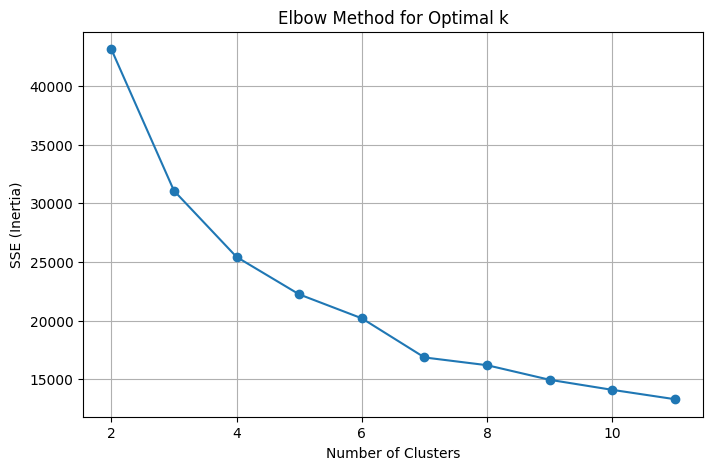

In [111]:


sse = []
k_range = range(2, 12)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(list(k_range), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


In [112]:
k = 3 # Adjust this value based on the elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_pca)

# Evaluate clustering quality
sil_score = silhouette_score(df_pca, clusters_kmeans)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.41622645986783696


In [113]:
# Fit a Gaussian Mixture Model with the same number of clusters (e.g., 4)
gmm = GaussianMixture(n_components=k, random_state=42)
clusters_gmm = gmm.fit_predict(df_pca)

# Evaluate GMM clustering performance with silhouette score
sil_score_gmm = silhouette_score(df_pca, clusters_gmm)
print("GMM Silhouette Score:", sil_score_gmm)


GMM Silhouette Score: 0.30998279792302913


In [114]:
# # Set DBSCAN parameters: eps and min_samples.
# # These parameters typically require tuning for your dataset.
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# clusters_dbscan = dbscan.fit_predict(df_pca)

# # Check unique cluster labels (-1 represents noise)
# unique_clusters = np.unique(clusters_dbscan)
# print("DBSCAN unique clusters (including noise):", unique_clusters)

In [115]:
# from sklearn.neighbors import NearestNeighbors
# # Define the number of neighbors (min_samples). A common heuristic is to use 5 or 10.
# min_samples = 5
# neighbors = NearestNeighbors(n_neighbors=min_samples)
# neighbors_fit = neighbors.fit(df_pca)
# distances, indices = neighbors_fit.kneighbors(df_pca)

# # Get the distance to the k-th nearest neighbor for each point
# k_distances = distances[:, -1]
# k_distances = np.sort(k_distances)

# plt.figure(figsize=(8, 5))
# plt.plot(k_distances, marker='o')
# plt.xlabel("Data Points (sorted)")
# plt.ylabel(f"Distance to {min_samples}-th Nearest Neighbor")
# plt.title("k-Distance Plot for DBSCAN eps tuning")
# plt.grid(True)
# plt.show()

In [116]:
# # Define a range of eps values (tweak these based on your k-distance plot)
# eps_values = np.linspace(0.1, 97, 20)  # Adjust range as needed
# min_samples_values = [5, 10]  # Try different min_samples values

# for eps in eps_values:
#     for min_samples in min_samples_values:
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         labels = dbscan.fit_predict(df_pca)
#         unique_labels = set(labels)
#         n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
#         print(f"eps: {eps:.2f}, min_samples: {min_samples}, clusters: {n_clusters}")


In [117]:

# for eps in eps_values:
#     for min_samples in min_samples_values:
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         labels = dbscan.fit_predict(df_pca)
#         unique_labels = set(labels)
#         n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
#         if n_clusters > 1:
#             score = silhouette_score(df_pca, labels)
#             print(f"eps: {eps:.2f}, min_samples: {min_samples}, clusters: {n_clusters}, silhouette: {score:.3f}")


## Visualization

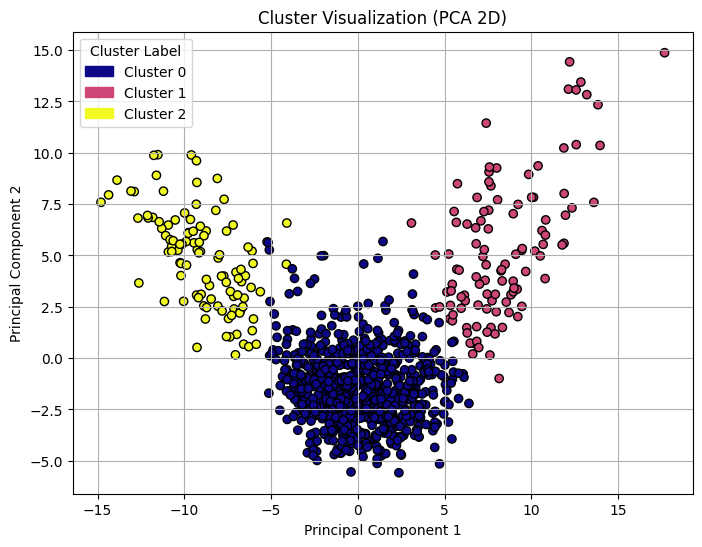

In [118]:


# If PCA produced at least 2 components, visualize clusters in 2D space with custom legend for clusters
if df_pca.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_kmeans, cmap="plasma", edgecolor='k')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("Cluster Visualization (PCA 2D)")
    plt.grid(True)
    
    # Create a custom legend for clusters
    unique_clusters = np.unique(clusters_kmeans)
    handles = []
    for cl in unique_clusters:
        # Get the color corresponding to the cluster label
        color = scatter.cmap(scatter.norm(cl))
        patch = mpatches.Patch(color=color, label=f"Cluster {cl}")
        handles.append(patch)
    
    plt.legend(handles=handles, title="Cluster Label", loc="best")
    plt.show()

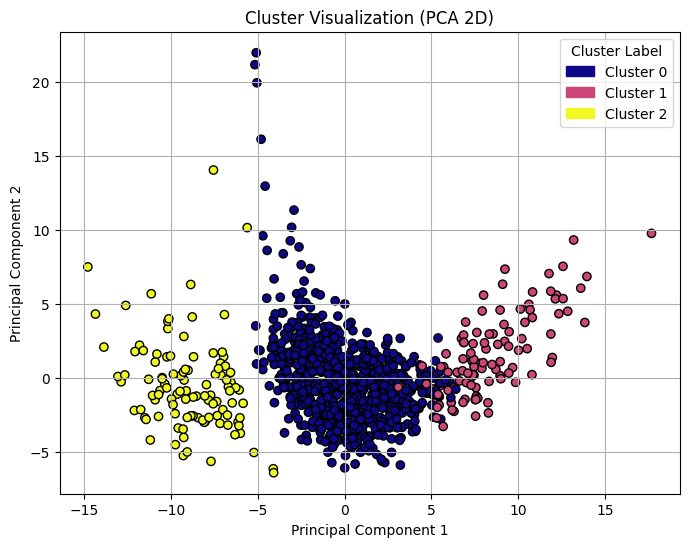

In [119]:
# If PCA produced at least 2 components, visualize clusters in 2D space with custom legend for clusters
if df_pca.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(df_pca[:, 0], df_pca[:, 2], c=clusters, cmap="plasma", edgecolor='k')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("Cluster Visualization (PCA 2D)")
    plt.grid(True)
    
    # Create a custom legend for clusters
    unique_clusters = np.unique(clusters)
    handles = []
    for cl in unique_clusters:
        # Get the color corresponding to the cluster label
        color = scatter.cmap(scatter.norm(cl))
        patch = mpatches.Patch(color=color, label=f"Cluster {cl}")
        handles.append(patch)
    
    plt.legend(handles=handles, title="Cluster Label", loc="best")
    plt.show()

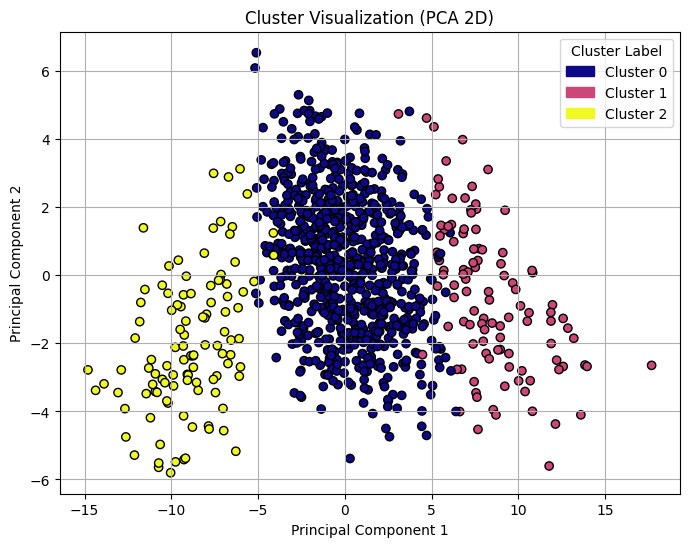

In [120]:
# If PCA produced at least 2 components, visualize clusters in 2D space with custom legend for clusters
if df_pca.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(df_pca[:, 0], df_pca[:, 3], c=clusters, cmap="plasma", edgecolor='k')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("Cluster Visualization (PCA 2D)")
    plt.grid(True)
    
    # Create a custom legend for clusters
    unique_clusters = np.unique(clusters)
    handles = []
    for cl in unique_clusters:
        # Get the color corresponding to the cluster label
        color = scatter.cmap(scatter.norm(cl))
        patch = mpatches.Patch(color=color, label=f"Cluster {cl}")
        handles.append(patch)
    
    plt.legend(handles=handles, title="Cluster Label", loc="best")
    plt.show()

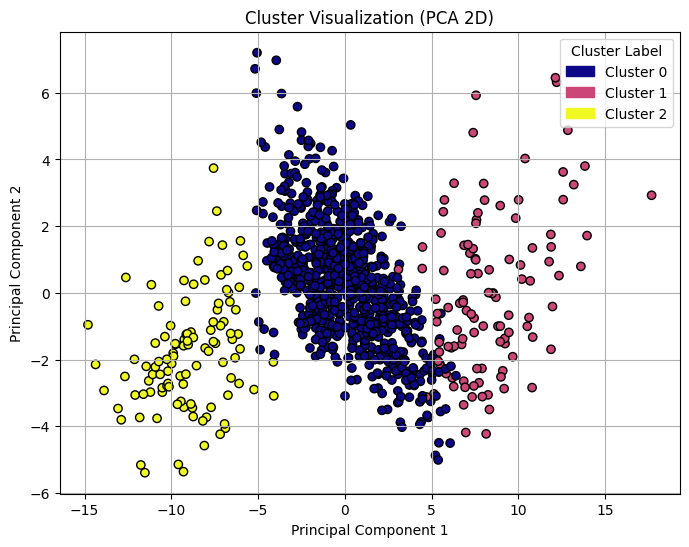

In [121]:
# If PCA produced at least 2 components, visualize clusters in 2D space with custom legend for clusters
if df_pca.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(df_pca[:, 0], df_pca[:, 4], c=clusters, cmap="plasma", edgecolor='k')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("Cluster Visualization (PCA 2D)")
    plt.grid(True)
    
    # Create a custom legend for clusters
    unique_clusters = np.unique(clusters)
    handles = []
    for cl in unique_clusters:
        # Get the color corresponding to the cluster label
        color = scatter.cmap(scatter.norm(cl))
        patch = mpatches.Patch(color=color, label=f"Cluster {cl}")
        handles.append(patch)
    
    plt.legend(handles=handles, title="Cluster Label", loc="best")
    plt.show()

In [122]:
# # If PCA produced at least 2 components, visualize clusters in 2D space with custom legend for clusters
# if df_pca.shape[1] >= 2:
#     plt.figure(figsize=(8, 6))
#     scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_gmm, cmap="plasma", edgecolor='k')
#     plt.xlabel("Principal Component 1")
#     plt.ylabel("Principal Component 2")
#     plt.title("Cluster Visualization (PCA 2D)")
#     plt.grid(True)
    
#     # Create a custom legend for clusters
#     unique_clusters = np.unique(clusters)
#     handles = []
#     for cl in unique_clusters:
#         # Get the color corresponding to the cluster label
#         color = scatter.cmap(scatter.norm(cl))
#         patch = mpatches.Patch(color=color, label=f"Cluster {cl}")
#         handles.append(patch)
    
#     plt.legend(handles=handles, title="Cluster Label", loc="best")
#     plt.show()

In [123]:
# # Visualize the DBSCAN clusters in the PCA-reduced space
# plt.figure(figsize=(8, 6))
# plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_dbscan, cmap='Accent', edgecolor='k')
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.title("DBSCAN Clusters (PCA 2D)")
# plt.grid(True)
# plt.show()

## Add Labels to Output Df

In [124]:
transformed_output_df.head()

,run_id,Resources_final,Resources_max,Resources_min,Resources_auc,Resources_max_min_diff,Resources_final_min_diff,Resources_final_initial_diff,Resources_time_to_collapse,Resources_std,...,Pollution_final_min_diff,Pollution_final_initial_diff,Pollution_time_to_collapse,Pollution_std,Pollution_growth_rate_t4,Pollution_growth_rate_t25,Pollution_early_delta,Pollution_mid_delta,Pollution_early_avg_diff,Pollution_mid_avg_diff
0,1.0,7.483451e+07,7.483451e+07,0.459866,7.161183e+08,7.483451e+07,7.483451e+07,7.483451e+07,200.0,1.112267e+07,...,0.00000,-1.000012,89.2,0.537022,0.066928,0.013563,0.077784,0.267711,0.015695,0.013532
1,2.0,-8.054008e-05,1.000000e+00,-0.000081,2.996052e+00,1.000081e+00,0.000000e+00,-1.000081e+00,5.2,9.567659e-02,...,1.14302,0.413895,200.0,0.320603,-0.026859,-0.027453,-0.013735,-0.107437,-0.002573,-0.005217
2,3.0,-1.693546e-04,1.000000e+00,-0.000169,4.514829e+00,1.000169e+00,0.000000e+00,-1.000169e+00,7.8,1.127861e-01,...,0.00000,-0.986061,72.2,0.300675,0.015316,-0.012533,0.025027,0.061262,0.005124,0.003193
3,4.0,-1.860879e-04,1.000000e+00,-0.000186,7.161374e+00,1.000186e+00,0.000000e+00,-1.000186e+00,12.6,1.400753e-01,...,0.00000,-0.983383,103.0,0.431694,0.039758,0.006860,0.046195,0.159030,0.009315,0.008042
4,5.0,8.005388e+05,8.005388e+05,0.447694,1.033277e+07,8.005384e+05,8.005384e+05,8.005378e+05,200.0,1.352522e+05,...,0.00000,-1.001063,165.6,1.499092,0.102492,0.048287,0.112099,0.409968,0.022537,0.020632


In [128]:
# Add cluster labels to the transformed DataFrame
transformed_output_df["cluster_id"] = clusters_kmeans

# Create a new df to map run_id to cluster_id
cluster_mapping_df = transformed_output_df[["run_id", "cluster_id"]]

cluster_mapping_df

,run_id,cluster_id
0,1.0,2
1,2.0,1
2,3.0,0
3,4.0,0
4,5.0,2
...,...,...
995,996.0,0
996,997.0,0
997,998.0,0
998,999.0,0


In [ ]:
# Check for duplicates in the mapping DataFrame
print('duplicates: ', cluster_mapping_df.duplicated().sum())
# Check for null values in the mapping DataFrame
print('null values: \n', cluster_mapping_df.isnull().sum())

duplicates:  0
null values: 
 run_id        0
cluster_id    0
dtype: int64


In [133]:
output_df.head()

,Resources,Economy,Bureaucracy,Pollution,time,run_id
0,1.000000,1.000000,1.000000,1.000000,0.0,1.0
1,0.983784,1.000960,0.998752,1.016100,0.2,1.0
2,0.967711,1.001403,0.997471,1.031933,0.4,1.0
3,0.951795,1.001332,0.996156,1.047494,0.6,1.0
4,0.936050,1.000748,0.994805,1.062779,0.8,1.0


In [134]:
# Merge the cluster mapping DataFrame with the original output DataFrame
output_df_with_labels = output_df.merge(cluster_mapping_df, on="run_id", how="left")
output_df_with_labels.head()

,Resources,Economy,Bureaucracy,Pollution,time,run_id,cluster_id
0,1.000000,1.000000,1.000000,1.000000,0.0,1.0,2
1,0.983784,1.000960,0.998752,1.016100,0.2,1.0,2
2,0.967711,1.001403,0.997471,1.031933,0.4,1.0,2
3,0.951795,1.001332,0.996156,1.047494,0.6,1.0,2
4,0.936050,1.000748,0.994805,1.062779,0.8,1.0,2


In [135]:
output_df_with_labels.tail()

,Resources,Economy,Bureaucracy,Pollution,time,run_id,cluster_id
1000995,-0.000081,-0.000107,0.340252,0.059603,199.2,1000.0,0
1000996,-0.000081,-0.000107,0.339812,0.059526,199.4,1000.0,0
1000997,-0.000081,-0.000107,0.339372,0.059449,199.6,1000.0,0
1000998,-0.000081,-0.000107,0.338933,0.059372,199.8,1000.0,0
1000999,-0.000081,-0.000107,0.338494,0.059295,200.0,1000.0,0


In [138]:
# Sanity check that each run id is only in one cluster
output_df_with_labels.groupby("run_id")["cluster_id"].nunique().value_counts()

cluster_id
1    1000
Name: count, dtype: int64

In [140]:
# Save the output DataFrame with cluster labels
output_df_with_labels.to_csv(os.path.join(porcessed_data_dir, 'bardis_ensemble_python_ver_1000_with_clusters.csv'), index=False)